In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [133]:
#load in train, label and test files. Label file contains total_cases
train = pd.read_csv('DengueProject/dengue_features_train.csv', parse_dates=[3])
labels = pd.read_csv('DengueProject/dengue_labels_train.csv')
test = pd.read_csv('DengueProject/dengue_features_test.csv', parse_dates=[3])



In [134]:
#fill in Na using front fill as suggested by DrivenData
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

train['month']= train.week_start_date.dt.month
test['month']= test.week_start_date.dt.month

In [135]:
#put the total cases label in the main dataframe
train = pd.merge(train, labels, on=['city', 'year', 'weekofyear'])

In [136]:
rolling_cols_mean=[
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_max_temp_c',
]

#Collect rolling means for the independent variables most correlated with total cases. Collect the rolling means over 52 weeks.

for col in rolling_cols_mean:
    train['rolling_mean_'+col] = pd.rolling_mean(train[col], 52)
    test['rolling_mean_'+col] = pd.rolling_mean(test[col], 52)
    
features=[                                    
'rolling_mean_reanalysis_specific_humidity_g_per_kg',    
'rolling_mean_station_avg_temp_c',                       
'rolling_mean_reanalysis_dew_point_temp_k',                                     
'rolling_mean_station_max_temp_c',                       
'rolling_mean_reanalysis_min_air_temp_k',                
'rolling_mean_reanalysis_max_air_temp_k',                
'rolling_mean_reanalysis_air_temp_k',                    
'rolling_mean_reanalysis_avg_temp_k',            
'reanalysis_specific_humidity_g_per_kg',               
'reanalysis_dew_point_temp_k',                          
'reanalysis_min_air_temp_k',                           
'station_min_temp_c'     
    ]



In [137]:
train.fillna(method='bfill', inplace=True)

test.fillna(method='bfill', inplace=True)
train.to_csv('new_train_features.csv')

In [138]:
sj = train[train['city']=='sj']
iq = train[train['city']=='iq']

sj_test=test[test['city']=='sj']
iq_test=test[test['city']=='iq']

In [139]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,total_cases,rolling_mean_reanalysis_air_temp_k,rolling_mean_reanalysis_avg_temp_k,rolling_mean_reanalysis_dew_point_temp_k,rolling_mean_reanalysis_max_air_temp_k,rolling_mean_reanalysis_min_air_temp_k,rolling_mean_reanalysis_relative_humidity_percent,rolling_mean_reanalysis_specific_humidity_g_per_kg,rolling_mean_station_avg_temp_c,rolling_mean_station_max_temp_c
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,4,298.831703,298.961538,294.874945,301.084615,297.005769,79.03033,16.326786,26.867582,31.830769
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,5,298.831703,298.961538,294.874945,301.084615,297.005769,79.03033,16.326786,26.867582,31.830769
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,4,298.831703,298.961538,294.874945,301.084615,297.005769,79.03033,16.326786,26.867582,31.830769
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,3,298.831703,298.961538,294.874945,301.084615,297.005769,79.03033,16.326786,26.867582,31.830769
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,6,298.831703,298.961538,294.874945,301.084615,297.005769,79.03033,16.326786,26.867582,31.830769


In [140]:
from sklearn import model_selection
from sklearn import linear_model


In [149]:
#test fit model on the last ~20% of the data
sj_Xtest = sj.tail(sj.shape[0] - 700)


iq_Xtest = iq.tail(iq.shape[0] - 250)

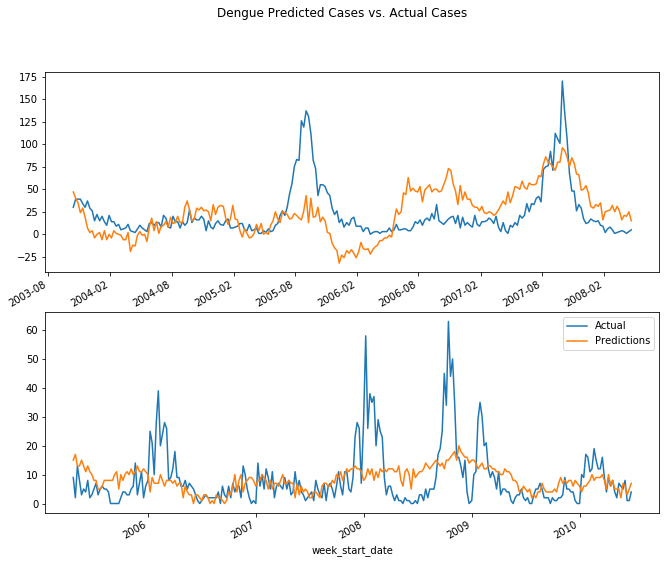

In [150]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X= sj[features]
Y = sj['total_cases']
lr = LinearRegression()
model = lr.fit(X, Y)

X1 = iq[features]
Y1 = iq['total_cases']
lr1 =  LinearRegression()
model1 = lr1.fit(X1,Y1)

preds_sj= model.predict(sj_Xtest[features]).astype(int)
preds_iq= model1.predict(iq_Xtest[features]).astype(int)

sj_Xtest['fitted'] = preds_sj
sj_Xtest.index = sj_Xtest['week_start_date']

iq_Xtest['fitted'] = preds_iq
iq_Xtest.index = iq_Xtest['week_start_date']

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
sj_Xtest.total_cases.plot(ax=axes[0], label="Actual")
sj_Xtest.fitted.plot(ax=axes[0], label="Predictions")

iq_Xtest.total_cases.plot(ax=axes[1], label="Actual")
iq_Xtest.fitted.plot(ax=axes[1], label="Predictions")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()


In [143]:
preds_sj= model.predict(sj_test[features]).astype(float)
preds_iq= model1.predict(iq_test[features]).astype(float)

In [144]:
submission = pd.read_csv("DengueProject/submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([preds_sj, preds_iq])
#add a total cases column to the test df
submission['total_cases'] = submission['total_cases'].astype(int)
submission.to_csv("lr.csv")

In [148]:

test=test.join(train.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')


test['total_cases'] = np.concatenate([preds_sj, preds_iq])
test['total_cases']=test['total_cases']+test['total_cases_avg']
test['random']=np.random.uniform(low=0.8, high=1.5, size=len(test))
#add some randomness
test['total_cases']=test['total_cases_avg']*test['random']
#save file
test.to_csv("test_preds_added1.csv")

0    10.816754
1    12.343890
2    15.617406
3    10.423269
4    20.375928
Name: total_cases, dtype: float64

In [ ]:
#save these predictions as the total predicted cases to be used in the negative binmoial as input for previous weeks
test['total_cases'] = np.concatenate([preds_sj, preds_iq])
test['total_cases']=test['total_cases']+test['total_cases_avg']
test['random']=np.random.uniform(low=0.8, high=1.5, size=len(test))
#add some randomness
test['total_cases']=test['total_cases_avg']*test['random']
#save file
test.to_csv("test_preds_added1.csv")